In [2]:
from tslearn.utils import to_time_series
my_first_time_series = [1, 3, 4, 2]
formatted_time_series = to_time_series(my_first_time_series)
print(formatted_time_series.shape)

(4, 1)


In [3]:
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("TwoPatterns")
print(X_train.shape)
print(y_train.shape)

(1000, 128, 1)
(1000,)


y_train.shape:  (322,)


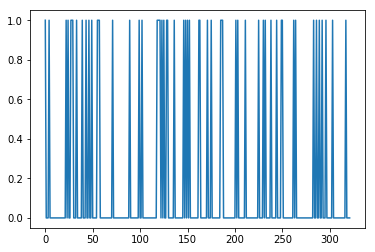

X_train.shape:  (322, 512, 1)


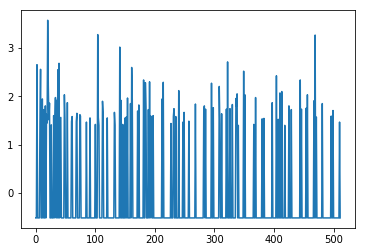

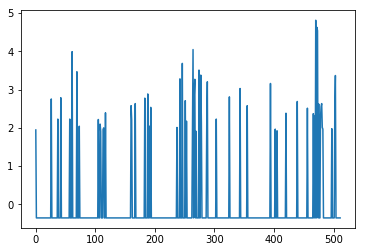

In [45]:

from pandas import Series
from matplotlib import pyplot

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
#X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Earthquakes")

print('y_train.shape: ', y_train.shape)
series = Series(y_train)
series.plot()
pyplot.show()


print('X_train.shape: ', X_train.shape)
#print(X_train[:,1,:])
series = Series(X_train[0,:,:].ravel())
series.plot()
pyplot.show()

series = Series(X_train[1,:,:].ravel())
series.plot()
pyplot.show()


 
    

##  KShape
This example uses the KShape clustering method that is based on cross-correlation to cluster time series.

X_train.shape:  (100, 275, 1) y_train shape:  (100,) X_test.shape:   (100, 275, 1) y_test.shape:  (100,)
X_train.shape:  275
ks:  KShape(max_iter=100, n_clusters=2, n_init=1, random_state=0, tol=1e-06,
    verbose=True)
0.007 --> 0.006 --> 0.006 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 
ks.cluster_centers_.shape:  (2, 275, 1)
ks._cross_dists:  <bound method KShape._cross_dists of KShape(max_iter=100, n_clusters=2, n_init=1, random_state=0, tol=1e-06,
    verbose=True)>


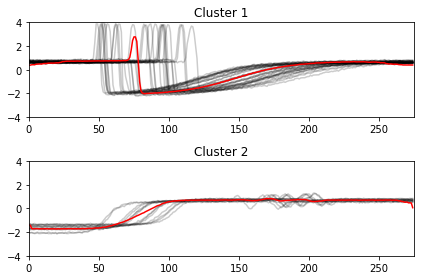

In [65]:
# Author: Romain Tavenard
# License: BSD 3 clause
%matplotlib inline

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")


print('X_train.shape: ', X_train.shape, 'y_train shape: ', y_train.shape, 'X_test.shape:  ', X_test.shape, 'y_test.shape: ',y_test.shape)
#print('X_train: ', X_train )

X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])  # Keep only 50 time series
sz = X_train.shape[1]
print('X_train.shape: ', sz)

# Euclidean k-means
ks = KShape(n_clusters=2, verbose=True, random_state=seed)
#ks = KShape(n_clusters=3, n_init=1, verbose=False, random_state=0).fit(X)

print('ks: ', ks)
y_pred = ks.fit_predict(X_train)

# view results information
print('ks.cluster_centers_.shape: ', ks.cluster_centers_.shape)

dists = ks._cross_dists(X_train)
print('ks._cross_dists: ', ks._cross_dists)


plt.figure()
for yi in range(2):
    plt.subplot(2, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [66]:
UCR_UEA_datasets().list_datasets()


['Adiac',
 'ArrowHead',
 'Beef',
 'BeetleFly',
 'BirdChicken',
 'Car',
 'CBF',
 'ChlorineConcentration',
 'CinCECGtorso',
 'Coffee',
 'Computers',
 'CricketX',
 'CricketY',
 'CricketZ',
 'DiatomSizeReduction',
 'DistalPhalanxOutlineCorrect',
 'DistalPhalanxOutlineAgeGroup',
 'DistalPhalanxTW',
 'Earthquakes',
 'ECG200',
 'ECG5000',
 'ECGFiveDays',
 'ElectricDevices',
 'FaceAll',
 'FaceFour',
 'FacesUCR',
 'FiftyWords',
 'Fish',
 'FordA',
 'FordB',
 'GunPoint',
 'Ham',
 'HandOutlines',
 'Haptics',
 'Herring',
 'InlineSkate',
 'InsectWingbeatSound',
 'ItalyPowerDemand',
 'LargeKitchenAppliances',
 'Lightning2',
 'Lightning7',
 'Mallat',
 'Meat',
 'MedicalImages',
 'MiddlePhalanxOutlineCorrect',
 'MiddlePhalanxOutlineAgeGroup',
 'MiddlePhalanxTW',
 'MoteStrain',
 'NonInvasiveFatalECGThorax1',
 'NonInvasiveFatalECGThorax2',
 'OliveOil',
 'OSULeaf',
 'PhalangesOutlinesCorrect',
 'Phoneme',
 'Plane',
 'ProximalPhalanxOutlineCorrect',
 'ProximalPhalanxOutlineAgeGroup',
 'ProximalPhalanxTW',
 

#### try the Computers dataset

X_train.shape:  (250, 720, 1) y_train shape:  (250,) X_test.shape:   (250, 720, 1) y_test.shape:  (250,)
X_train.shape:  720
ks:  KShape(max_iter=100, n_clusters=5, n_init=1, random_state=0, tol=1e-06,
    verbose=True)
0.177 --> 0.144 --> 0.139 --> 0.137 --> 0.137 --> 0.137 --> 
ks.cluster_centers_.shape:  (5, 720, 1)
ks.labels_:  [4 2 1 4 4 4 2 2 4 4 0 2 2 4 3 4 4 4 3 0 2 1 2 1 2 1 2 0 4 4 3 3 1 2 4 0 0
 2 0 4 2 3 2 4 3 4 3 1 1 4 3 2 4 2 0 0 2 4 3 4 1 3 2 1 0 1 4 2 3 4 1 4 3 1
 2 2 4 2 4 3 2 0 2 4 2 1 2 2 3 4 1 4 4 4 1 0 2 0 4 2]
ks.inertia_:  0.13674799357
ks.predict(X_test):  [1 3 1 1 3 2 2 2 2 4 4 0 3 4 2 3 3 4 0 4 1 1 1 1 1 4 2 2 4 2 0 1 2 3 3 2 2
 4 2 2 1 1 1 1 1 3 1 1 1 1 4 2 0 1 2 0 1 4 1 3 2 0 0 2 3 2 2 2 2 3 0 1 1 1
 1 3 4 3 1 4 2 4 4 2 0 1 1 4 1 3 4 0 1 1 1 3 3 3 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

<Figure size 432x288 with 0 Axes>

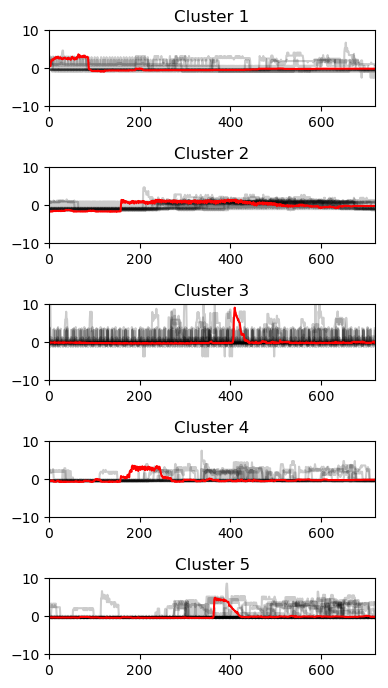

<Figure size 432x288 with 0 Axes>

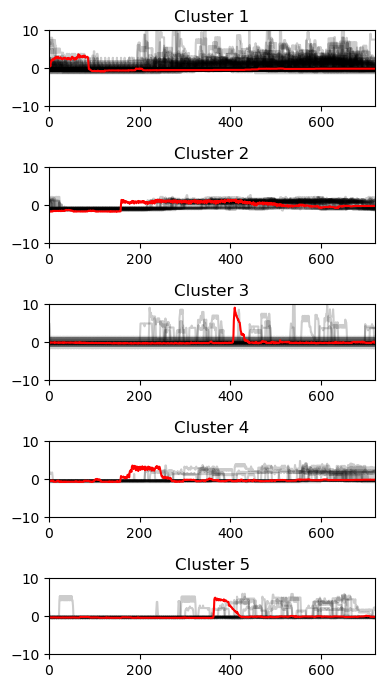

In [76]:
from tslearn.datasets import UCR_UEA_datasets

num_clusters = 5
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Computers")

print('X_train.shape: ', X_train.shape, 'y_train shape: ', y_train.shape, 'X_test.shape:  ', X_test.shape, 'y_test.shape: ',y_test.shape)
#print('X_train: ', X_train )

X_train = X_train[y_train < 10]  # Keep first 3 classes
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:100])  # Keep only 100 time series
sz = X_train.shape[1]
print('X_train.shape: ', sz)


# Euclidean k-means
ks = KShape(n_clusters=num_clusters, verbose=True, random_state=seed)
print('ks: ', ks)
y_pred = ks.fit_predict(X_train)

#cluster results metadata
print('ks.cluster_centers_.shape: ', ks.cluster_centers_.shape)
print('ks.labels_: ', ks.labels_)
print('ks.inertia_: ', ks.inertia_)

# run against test
xtest_pred= ks.predict(X_test)
print('ks.predict(X_test): ', xtest_pred)

#plt.figure(figsize=(5,5)) 
#plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.figure()
fig = plt.figure(figsize=(4,7))

for yi in range(num_clusters):
    plt.subplot(num_clusters, 1, 1 + yi)
    
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    #plt.figure(figsize=(8, 6), dpi=80)
    plt.xlim(0, sz)
    plt.ylim(-10, 10)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()

fig.savefig('KShape_plot.pdf')
fig.set_dpi(100)

plt.show()



plt.figure()
fig = plt.figure(figsize=(4,7))

for yi in range(num_clusters):
    plt.subplot(num_clusters, 1, 1 + yi)
    
    for xx in X_test[xtest_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-10, 10)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()

fig.savefig('KShape_plot.pdf')
fig.set_dpi(100)

plt.show()



#### Shaplets

<Figure size 432x288 with 0 Axes>

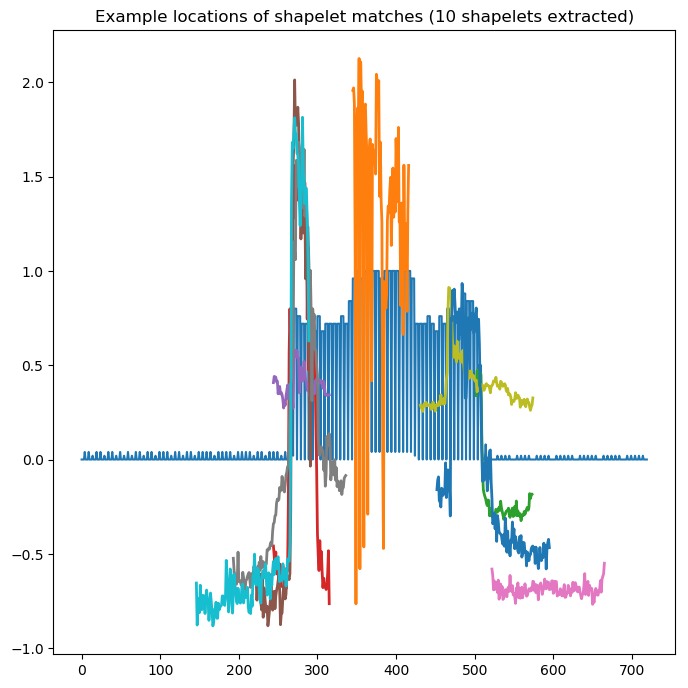

In [46]:
from keras.optimizers import Adagrad

from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import ShapeletModel, grabocka_params_to_shapelet_size_dict


X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Computers")

X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0],
                                                       ts_sz=X_train.shape[1],
                                                       n_classes=len(set(y_train)),
                                                       l=0.1,
                                                       r=2)

shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=Adagrad(lr=.1),
                        weight_regularizer=.01,
                        max_iter=50,
                        verbose_level=0)
shp_clf.fit(X_train, y_train)
predicted_locations = shp_clf.locate(X_test)

test_ts_id = 0
plt.figure()
fig = plt.figure(figsize=(7,7))

plt.title("Example locations of shapelet matches (%d shapelets extracted)" % sum(shapelet_sizes.values()))
plt.plot(X_test[test_ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[test_ts_id, idx_shp]
    plt.plot(numpy.arange(t0, t0 + len(shp)), shp, linewidth=2)

plt.tight_layout()
fig.savefig('shapelet_plot.pdf')
fig.set_dpi(100)
plt.show()


#### sciket-learn DBSCAN

In [59]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Earthquakes")
#series = Series(X_train[0:50,0:50,:])

X = X_train[:,:,0]

print('X: ', X)

print('y_train: ', y_train) 

#db = DBSCAN(eps=2,min_samples=5)
#db.fit_predict(y)


X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, labels))
print("Silhouette Coefficient: %0.3f"  % metrics.silhouette_score(X, labels))



X:  [[-0.51801 -0.51801  2.6542  ..., -0.51801  1.4658  -0.51801]
 [ 1.9437  -0.35311 -0.35311 ..., -0.35311 -0.35311 -0.35311]
 [ 2.6385  -0.3161  -0.3161  ..., -0.3161  -0.3161  -0.3161 ]
 ..., 
 [-0.26465 -0.26465 -0.26465 ..., -0.26465 -0.26465 -0.26465]
 [-0.49083 -0.49083 -0.49083 ..., -0.49083 -0.49083 -0.49083]
 [-0.48392 -0.48392 -0.48392 ..., -0.48392 -0.48392 -0.48392]]
y_train:  [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)